In [1]:
import requests
from bs4 import BeautifulSoup

google_url = 'http://www.google.com.tw/search'

my_params = {'q':'人工智慧'}

r = requests.get(google_url, params = my_params)

if r.status_code == requests.codes.ok:
    soup =BeautifulSoup(r.text, 'html.parser')
    
    items = soup.select('div.kCrYT>a[href^="/url"]')
    
    for i in items:
        print("標題 : " + i.text)
        print("網址 : " + i.get('href'))

標題 : 人工智能- 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 人工智能
網址 : /url?q=https://zh.wikipedia.org/zh-tw/%25E4%25BA%25BA%25E5%25B7%25A5%25E6%2599%25BA%25E8%2583%25BD&sa=U&ved=2ahUKEwj01N-hw8PlAhWzwosBHWg_BBUQFjAAegQIBBAB&usg=AOvVaw1WuMK7dVntVcQb1tgSr0qo
標題 : AI來襲！三分鐘看懂人工智慧| Building Maker Economy：自造達人社 ...https://makerpro.cc › 2019/05 › introduction-to-ai
網址 : /url?q=https://makerpro.cc/2019/05/introduction-to-ai/&sa=U&ved=2ahUKEwj01N-hw8PlAhWzwosBHWg_BBUQFjABegQICBAB&usg=AOvVaw2BnhfBxGr4yVob2cu_Yaah
標題 : 什麼是人工智慧(AI)？ – Amazon Web Serviceshttps://aws.amazon.com › machine-learning › what-is-ai
網址 : /url?q=https://aws.amazon.com/tw/machine-learning/what-is-ai/&sa=U&ved=2ahUKEwj01N-hw8PlAhWzwosBHWg_BBUQFjACegQIBRAB&usg=AOvVaw0zGvfvtVf2GC6wO6IoiPUQ
標題 : 機器是如何學習與進步？人工智慧的核心技術與未來 - 科學月刊scimonth.blogspot.com › 2018/03 › blog-post_56
網址 : /url?q=http://scimonth.blogspot.com/2018/03/blog-post_56.html&sa=U&ved=2ahUKEwj01N-hw8PlAhWzwosBHWg_BBUQFjADegQIBxAB&usg=AOvVaw13FRTFKHCqdZDOyzGJxoPF
標題 : 人工

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

Building prefix dict from C:\Users\K410\1030\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\K410\AppData\Local\Temp\jieba.u7b4c6779b32daa4ae91e5223e4e80dec.cache


人工智能- 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 人工智能AI來襲！三分鐘看懂人工智慧| Building Maker Economy：自造達人社 ...https://makerpro.cc › 2019/05 › introduction-to-ai什麼是人工智慧(AI)？ – Amazon Web Serviceshttps://aws.amazon.com › machine-learning › what-is-ai機器是如何學習與進步？人工智慧的核心技術與未來 - 科學月刊scimonth.blogspot.com › 2018/03 › blog-post_56人工智慧不是萬能一張圖讓你秒懂｜產業｜科技｜2019-05-24｜天下 ...https://www.cw.com.tw › article › article.action什麼是人工智慧？︱《三分鐘財經教室》#01 - YouTubehttps://www.youtube.com › watch『AI人工智慧！機器學習& 突如其來的危機』芬特克FinTech EP3 ...https://www.youtube.com › watchAI 人工智慧| TechNews 科技新報https://technews.tw › category人工智慧- MBA智库百科https://wiki.mbalib.com › zh-tw › 人工智能人工智慧到底在幹嘛？｜數位時代https://www.bnext.com.tw › article › what-is-ai


Loading model cost 1.203 seconds.
Prefix dict has been built succesfully.


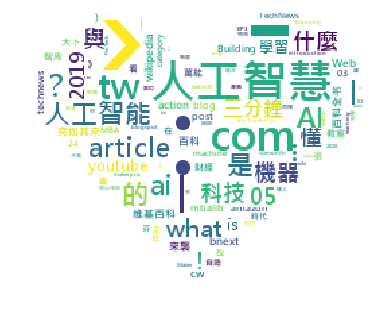

In [3]:
text =''
for i in items:
    text = text + i.text
print( text)

jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt',"r",encoding='utf-8-sig') as f:

    stops = f.read().split('\n')
terms = []
for t in jieba.cut(text, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)
font = "C:\\Windows\\Fonts\\msjhbd.ttc"

mask = np.array(Image.open("heart.png"))

wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)
wordcloud.generate_from_frequencies(diction)

plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")
